In [6]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pandas as pd
import numpy as np

url='https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-dhaka-weather1953-2016.csv'
df= pd.read_csv(url)
df.head()

,YEAR,Month,MaxTemp,MinTemp,RelativeHumidity,Rainfall
0,1953,1,26.7,10.9,70,10.0
1,1953,2,33.6,14.7,65,2.0
2,1953,3,37.5,21.7,73,90.0
3,1953,4,37.7,23.4,69,90.0
4,1953,5,34.7,24.2,81,274.0


In [7]:
df.isnull().values.any()

False

In [8]:
df.describe()

,YEAR,Month,MaxTemp,MinTemp,RelativeHumidity,Rainfall
count,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,1984.500000,6.500000,33.438529,21.51875,75.207031,168.377214
std,18.484992,3.454302,2.964510,4.97461,8.593081,173.784463
min,1953.000000,1.000000,24.300000,9.50000,49.000000,0.000000
25%,1968.750000,3.750000,31.875000,17.15000,69.000000,13.000000
50%,1984.500000,6.500000,33.900000,23.70000,76.000000,121.000000
75%,2000.250000,9.250000,35.525000,25.80000,83.000000,273.250000
max,2016.000000,12.000000,40.800000,28.10000,90.000000,856.000000


In [9]:
df.corr()

,YEAR,Month,MaxTemp,MinTemp,RelativeHumidity,Rainfall
YEAR,1.000000e+00,7.480458e-16,0.044080,0.098500,-0.165042,-0.009006
Month,7.480458e-16,1.000000e+00,-0.134986,0.210387,0.481070,0.125966
MaxTemp,4.407971e-02,-1.349862e-01,1.000000,0.724186,0.097398,0.365135
MinTemp,9.849999e-02,2.103873e-01,0.724186,1.000000,0.624770,0.687317
RelativeHumidity,-1.650420e-01,4.810704e-01,0.097398,0.624770,1.000000,0.708577
Rainfall,-9.006300e-03,1.259665e-01,0.365135,0.687317,0.708577,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

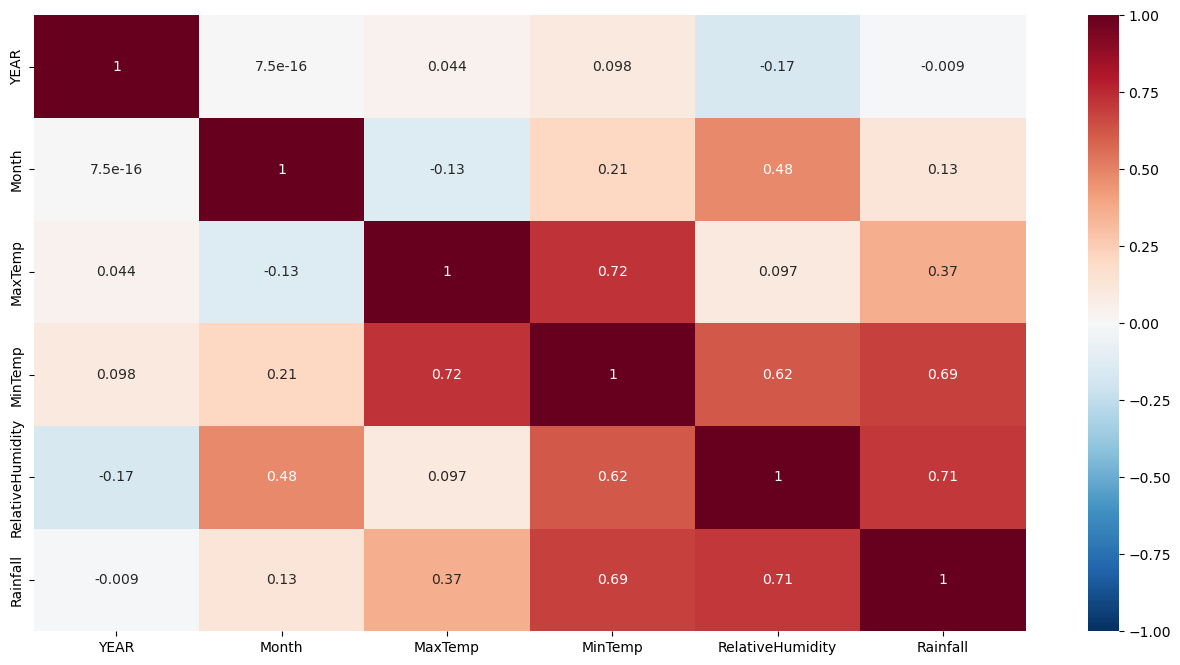

In [11]:
#heatmap
correlation=df.corr()
plt.figure(figsize=(16,8))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap='RdBu_r')
plt.show

In [12]:
rain=df.groupby('Month')['Rainfall'].mean()
rain

Month
1       6.781250
2      19.703125
3      54.307812
4     126.431250
5     271.131250
6     360.075000
7     382.076563
8     313.971875
9     284.639063
10    164.120313
11     28.017187
12      9.271875
Name: Rainfall, dtype: float64

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

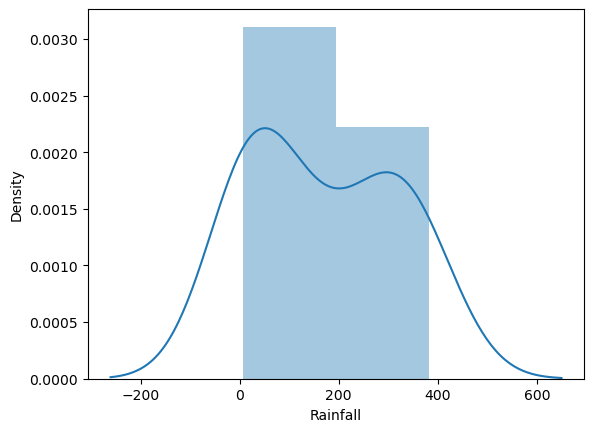

In [13]:
sns.distplot(rain)

In [15]:
df.groupby('Month')['Rainfall'].mean().sort_values(ascending=False)

Month
7     382.076563
6     360.075000
8     313.971875
9     284.639063
5     271.131250
10    164.120313
4     126.431250
3      54.307812
11     28.017187
2      19.703125
12      9.271875
1       6.781250
Name: Rainfall, dtype: float64

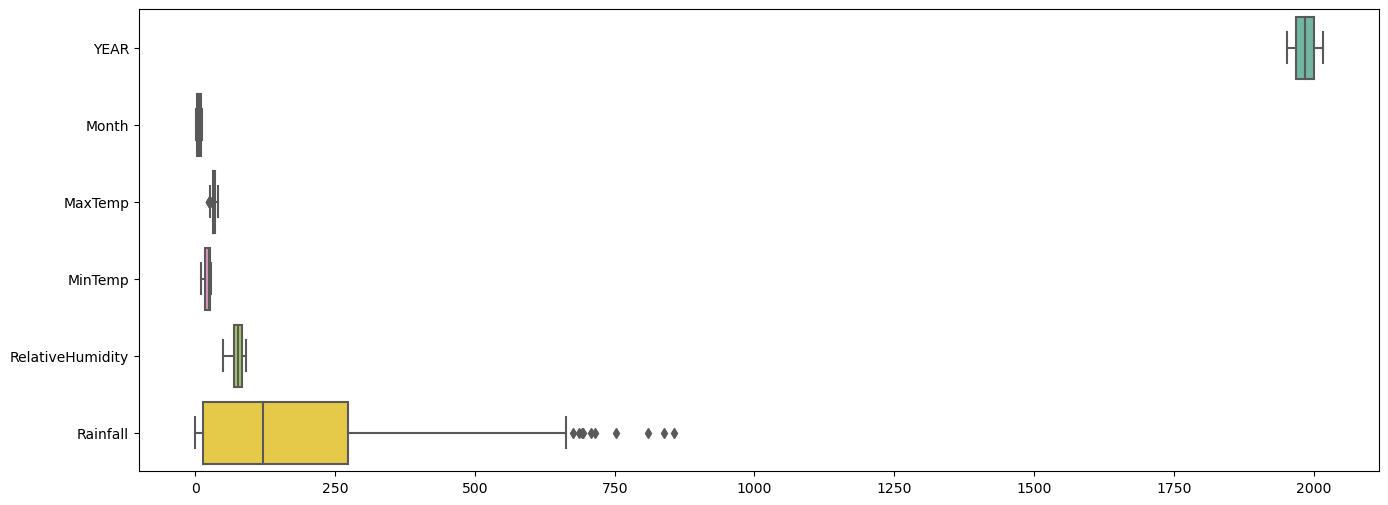

In [17]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(data=df,orient='h',palette='Set2')

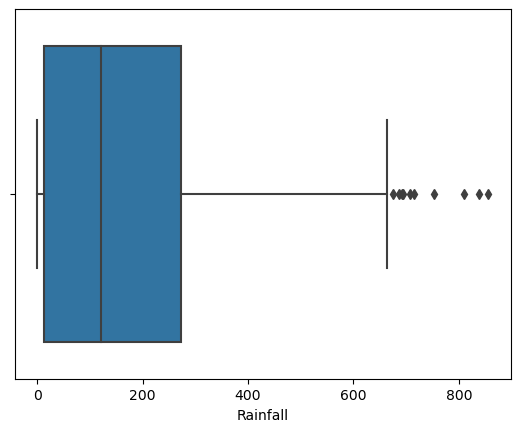

In [18]:
ax=sns.boxplot(x=df['Rainfall'])

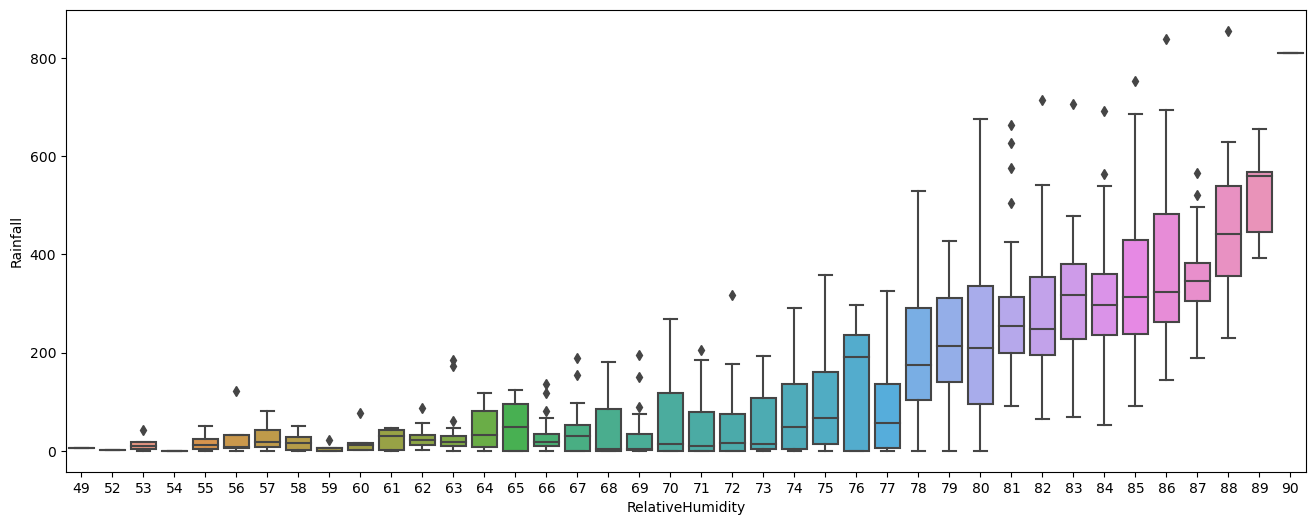

In [20]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x='RelativeHumidity', y='Rainfall',data=df)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1600x600 with 0 Axes>

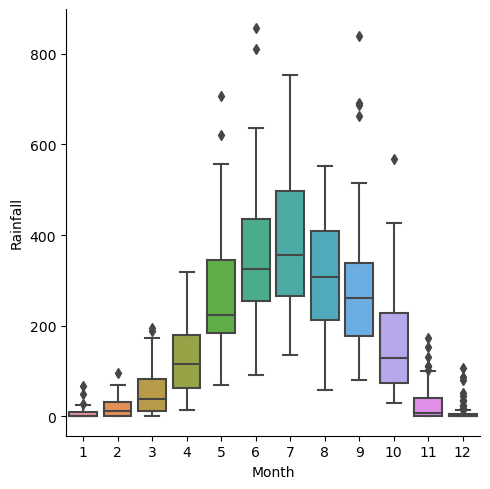

In [21]:
plt.figure(figsize=(16,6))
ax=sns.catplot('Month',y='Rainfall',kind='box',data=df);

array([[<AxesSubplot:title={'center':'YEAR'}>,
        <AxesSubplot:title={'center':'Month'}>],
       [<AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'MinTemp'}>],
       [<AxesSubplot:title={'center':'RelativeHumidity'}>,
        <AxesSubplot:title={'center':'Rainfall'}>]], dtype=object)

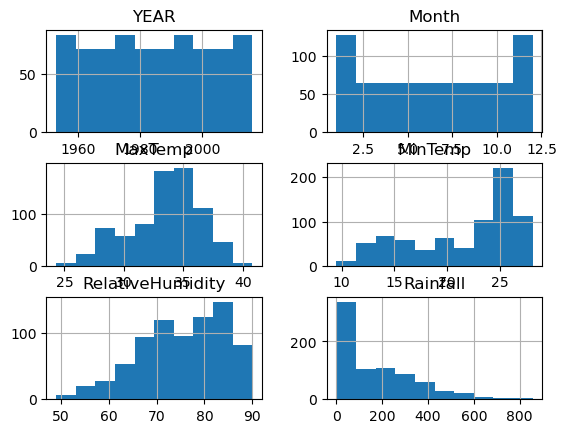

In [22]:
df.hist()

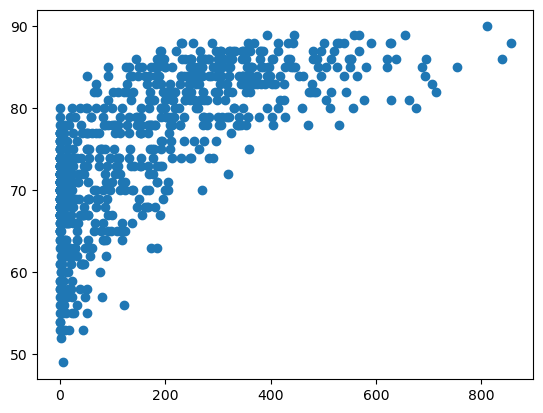

In [23]:
plt.scatter(df.Rainfall,df.RelativeHumidity)

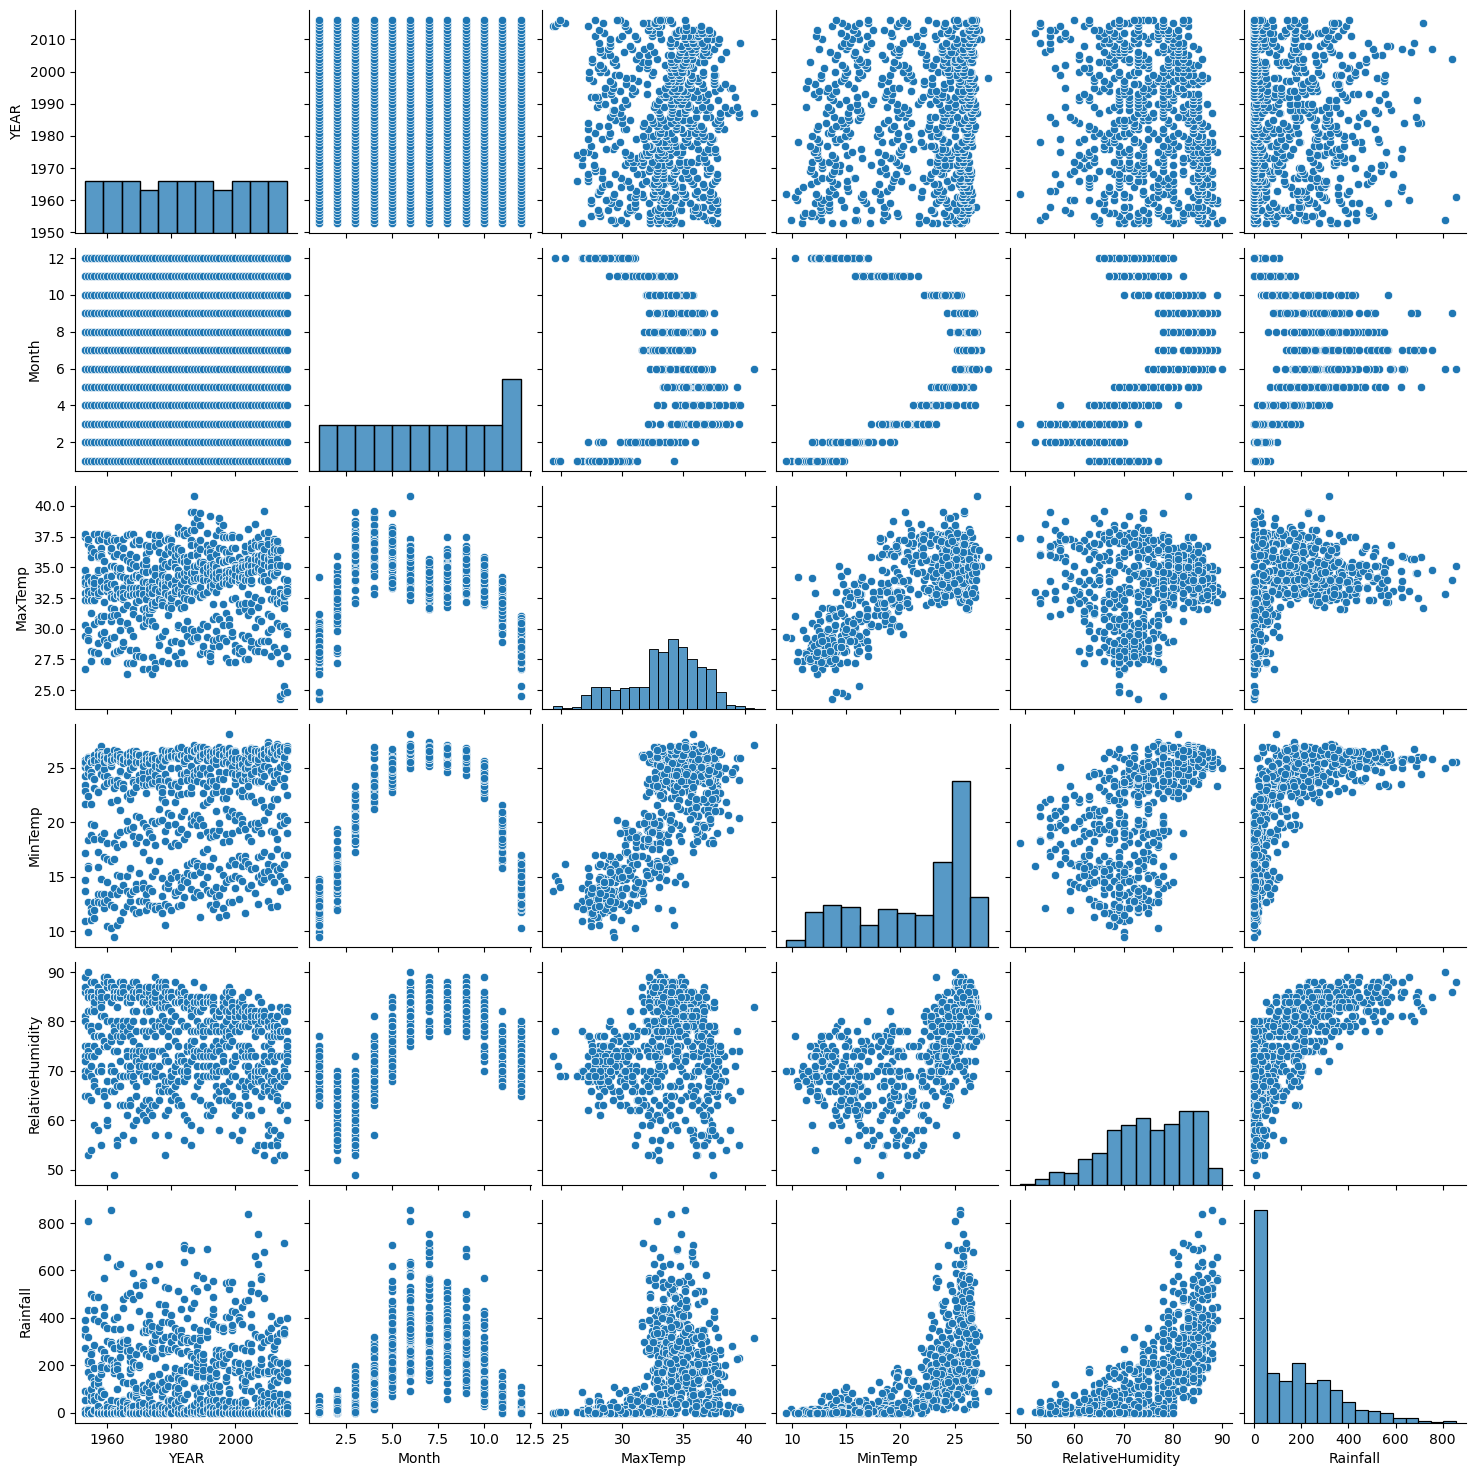

In [24]:
sns.pairplot(df);

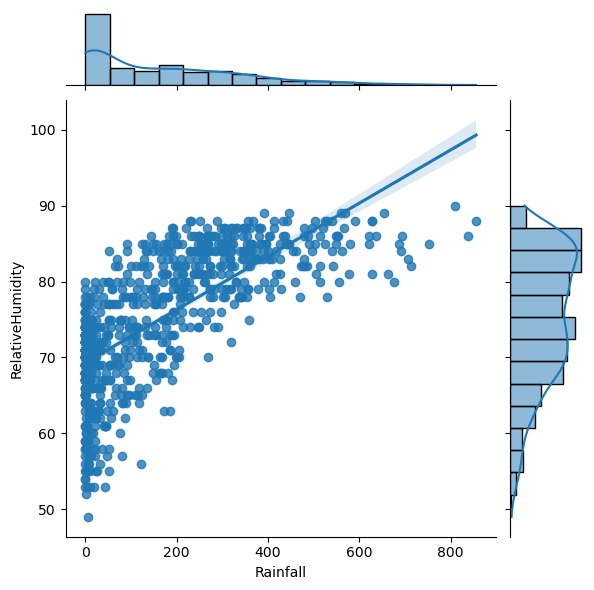

In [26]:
sns.jointplot(x='Rainfall', y='RelativeHumidity',data=df,kind='reg');

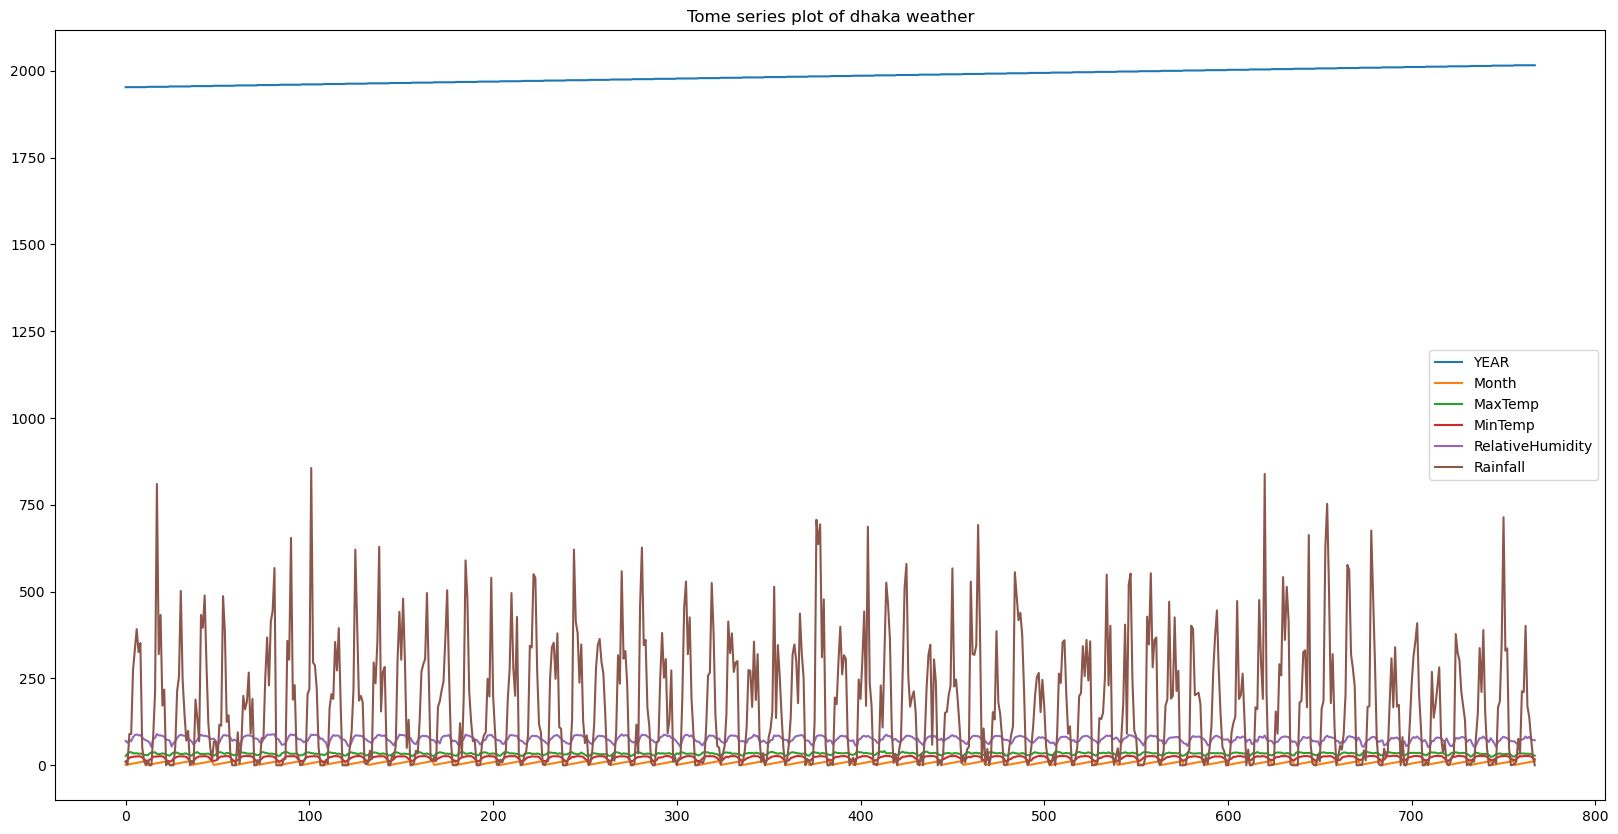

In [27]:
import matplotlib.pyplot as plt
df.plot(figsize=(20,10))
plt.title("Tome series plot of dhaka weather")
plt.show()

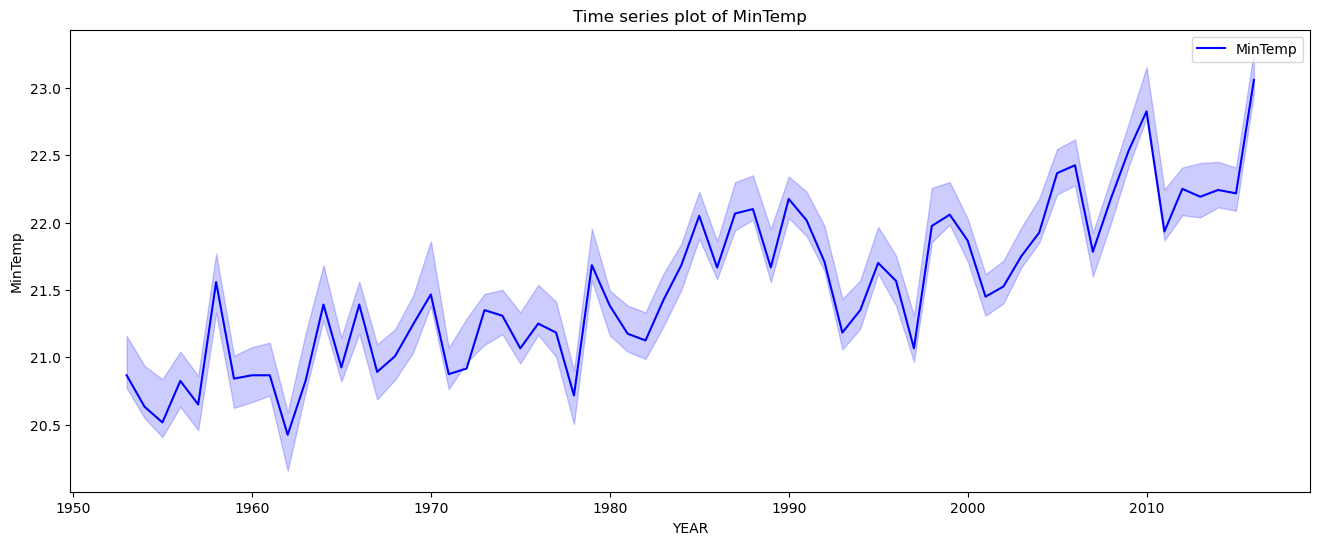

In [30]:
plt.figure(figsize=(16,6))
plt.title('Time series plot of MinTemp')
ax=sns.lineplot(x='YEAR',y='MinTemp',ci=10,color='Blue',label='MinTemp',data=df)

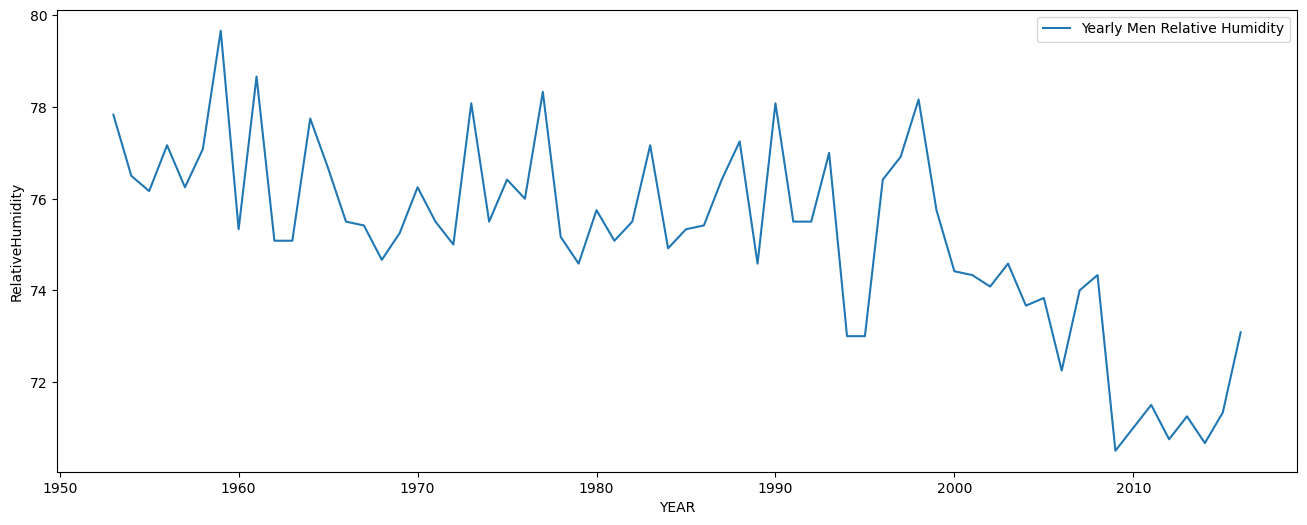

In [32]:
rh=df.groupby('YEAR')['RelativeHumidity'].mean()
plt.figure(figsize=(16,6))
ax= sns.lineplot(label='Yearly Men Relative Humidity',data=rh)